<a href="https://colab.research.google.com/github/szklipy/F1_driver_standings_predictor/blob/main/F1_Driver_standings_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()
import os

from pandas.plotting import scatter_matrix

In [2]:
drivers = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/drivers.csv')
driver_result = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/results.csv')
races = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/races.csv')
circuits = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/circuits.csv')
driver_standings = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/driver_standings.csv')
laptimes = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/lap_times.csv')
qualifying = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/qualifying.csv')

In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
driver_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [3]:
races_date = races[['date','circuitId','raceId']]
races_date['date'] = pd.to_datetime(races_date['date'])

#2023-as szezon törlése 
races_date = races_date[(races_date['date'].dt.year!=2023)]
races_date

<ipython-input-3-9d752a6b1b60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  races_date['date'] = pd.to_datetime(races_date['date'])


,date,circuitId,raceId
0,2009-03-29,1,1
1,2009-04-05,2,2
2,2009-04-19,17,3
3,2009-04-26,3,4
4,2009-05-10,4,5
...,...,...,...
1074,2022-10-09,22,1092
1075,2022-10-23,69,1093
1076,2022-10-30,32,1094
1077,2022-11-13,18,1095


In [4]:
circuits = pd.read_csv('/content/drive/MyDrive/bev gépi tanulás/adathalmazok/circuits.csv')
#csak a 2023as szezon versenypályái legyenek benne
this_season_circuitsId = [2,74,0,71,76,20,5,3,6,69,8,10,12,38,13,14,21,75,68,31,17,22,23]
columns_we_need = ['circuitId','circuitRef','name','location','country',]# többi oszlop fölösleges
circuits_df = pd.DataFrame(circuits,index=this_season_circuitsId,columns=columns_we_need)
circuits_df

,circuitId,circuitRef,name,location,country
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
71,73,baku,Baku City Circuit,Baku,Azerbaijan
76,79,miami,Miami International Autodrome,Miami,USA
20,21,imola,Autodromo Enzo e Dino Ferrari,Imola,Italy
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
69,70,red_bull_ring,Red Bull Ring,Spielberg,Austria


In [ ]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [ ]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [5]:
laptimes = laptimes[['raceId','driverId','lap','milliseconds']]
laptimes.head()

,raceId,driverId,lap,milliseconds
0,841,20,1,98109
1,841,20,2,93006
2,841,20,3,92713
3,841,20,4,92803
4,841,20,5,92342


In [ ]:
qualifying = qualifying[['driverId','position']]
qualifying.head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


In [6]:
df1 = pd.merge(driver_result, races, on ='raceId')
df_race= pd.merge(df1, drivers, on = 'driverId')
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,24,18,12,12,12,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25836,25798,1094,855,51,24,12,13,13,13,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25837,25817,1095,855,51,24,13,12,12,12,0.0,...,2022-11-12,19:30:00,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25838,25837,1096,855,51,24,15,12,12,12,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [7]:
#később használatos oszlopok törlése (time, milliseconds, fastestLap, fastestLapTime, fastestLapSpeed, statusId)
posterior_data = ['laps', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x', 'time_y', 'positionOrder']
df_race = df_race.drop(columns=posterior_data)
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,points,rank,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,10.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,4.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,0.0,19,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,6.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,8.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,24,18,12,12,0.0,15,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25836,25798,1094,855,51,24,12,13,13,0.0,7,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25837,25817,1095,855,51,24,13,12,12,0.0,17,...,2022-11-12,19:30:00,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25838,25837,1096,855,51,24,15,12,12,0.0,8,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [8]:
#fölösleges oszlopok törlése
df_race = df_race.drop(columns=['position',  'positionText', 'number_x', 'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'nationality', 'url_x', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'quali_date', 'quali_time', 'fp3_date', 'fp3_time', 'name'])
df_race

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,18,0.0,15,2022,19,69,2022-10-23,ZHO,Guanyu,Zhou,1999-05-30
25836,25798,1094,855,51,12,0.0,7,2022,20,32,2022-10-30,ZHO,Guanyu,Zhou,1999-05-30
25837,25817,1095,855,51,13,0.0,17,2022,21,18,2022-11-13,ZHO,Guanyu,Zhou,1999-05-30
25838,25837,1096,855,51,15,0.0,8,2022,22,24,2022-11-20,ZHO,Guanyu,Zhou,1999-05-30


In [9]:
#string->datetime
df_race['dob'] = pd.to_datetime(df_race['dob'])
df_race['date'] = pd.to_datetime(df_race['date'])

In [10]:
#életkor hozzáadása
dates = datetime.today()-df_race['dob']
age = dates.dt.days/365
df_race['age'] = round(age)
df_race.head()

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob,age
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,38.0
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07,38.0
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07,38.0
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07,38.0
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07,38.0


In [11]:
# Adding two column (forename,surname) to create a single column called driver_name


df_race['driver_name'] = df_race['forename']+' '+df_race['surname']
df_race = df_race.drop(['forename','surname'],1)
df_race.head()

<ipython-input-11-4bd99c69c017>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_race = df_race.drop(['forename','surname'],1)


,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,dob,age,driver_name
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,1985-01-07,38.0,Lewis Hamilton
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,1985-01-07,38.0,Lewis Hamilton
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,1985-01-07,38.0,Lewis Hamilton
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,1985-01-07,38.0,Lewis Hamilton
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,1985-01-07,38.0,Lewis Hamilton


In [12]:
###WINNING RATE

# INITIALISATION
df_driver = drivers.copy()
df_driver['totalWins'] = 0

race_dates = races[['raceId','date']]
# CLEANING AND ADDING

# adding dates to each race
driver_standings = driver_standings.merge(race_dates[['raceId', 'date']], how='left', on='raceId')

# Convert the "date" column to a datetime object
driver_standings['date'] = pd.to_datetime(driver_standings['date'])

# Create a new column 'year' to extract the year from the 'date' column
driver_standings['year'] = driver_standings['date'].dt.year
# driver_standings_csv.head()

# count the number of races each driver has driven in
num_races_per_driver = driver_standings.groupby('driverId')['raceId'].nunique()
num_races_per_driver_df = num_races_per_driver.reset_index()
num_races_per_driver_df = num_races_per_driver_df.rename(columns={'raceId': 'totalRaces'})
# num_races_per_driver_df.head()

# FINDING TOTAL WINS FOR EACH DRIVER
for index, row in df_driver.iterrows():
    driverId = row['driverId']

    # filtering out rows with ['driverId'] == driverId
    driver_standings_csv_driverId = driver_standings[driver_standings['driverId'] == driverId]

    # Group the dataframe by year and find the maximum date for each year
    latest_day_in_year = driver_standings_csv_driverId.groupby(driver_standings_csv_driverId['date'].dt.year)['date'].max()

    # Use the latest day in each year to filter the original dataframe
    filtered_dataframe = driver_standings_csv_driverId.loc[driver_standings_csv_driverId['date'].isin(latest_day_in_year)]

    total_wins = filtered_dataframe['wins'].sum()
    
    index = df_driver.index[df_driver['driverId'] == driverId].tolist()[0]
    df_driver.at[index, 'totalWins'] = total_wins


# adding dates to each race
df_driver = df_driver.merge(num_races_per_driver_df, how='left', on='driverId')

# calculate win rate and drop totalWins columns
df_driver['winRate'] = df_driver['totalWins'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalWins'], axis=1)
df_driver['dob'] = pd.to_datetime(df_driver['dob'])
df_driver['age'] = 2023 - df_driver['dob'].dt.year
    
# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42


In [14]:
###FASTEST LAPTIME WINING RATE


# Group the dataframe by raceId and find the index of the row with the minimum milliseconds
idx = laptimes.groupby('raceId')['milliseconds'].idxmin()

# Use the index to select the rows with the minimum milliseconds for each raceId
df_min_milliseconds = laptimes.loc[idx]

# Sort the result by raceId
df_min_milliseconds.sort_values('raceId', inplace=True)

counts = pd.DataFrame(df_min_milliseconds['driverId'].value_counts())
counts.columns = ['totalFastestLaps']
counts['driverId'] = counts.index
counts.reset_index(drop=True, inplace=True)

# adding totalFastestLaps to df maindata_wnames
df_driver = df_driver.merge(counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['fastestLapRate'] = df_driver['totalFastestLaps'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalFastestLaps'], axis=1)

# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018


In [15]:
#### QUALIFYING WINNING RATE


# COUNTING THE NUMBER OF QUALIFYING WINS
# Group by driverId and position, then count the number of occurrences
position_1_counts = qualifying[qualifying['position'] == 1].groupby('driverId')['position'].count().reset_index()

# Rename the 'position' column to 'position_1_count'
position_1_counts = position_1_counts.rename(columns={'position': 'position_1_count'})

# # Print the resulting DataFrame
# position_1_counts.head()

# merge
df_driver = df_driver.merge(position_1_counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['qualifyingWinRate'] = df_driver['position_1_count'] / df_driver['totalRaces']
df_driver = df_driver.drop(['position_1_count'], axis=1)

# filling in NaN values for qualifyingWinRate
df_driver.fillna(0, inplace=True)

df_driver.head()



,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926,0.340836
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309,0.005155
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087,0.145631
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018,0.009009


In [16]:
#ez a saját szrom, hogy azok a pilóták akik most vannak
this_season_driversId = [0,845,828,813,842,830,3,838,850,854,844,855,837,840,853,820,856,846,806,823]
columns_we_need = ['driverId','number','forename','surname','nationality','dob']
this_season_drivers_df = pd.DataFrame(drivers,index=this_season_driversId,columns=columns_we_need)
print(this_season_drivers_df)

     driverId number   forename     surname nationality         dob
0           1     44      Lewis    Hamilton     British  1985-01-07
845       847     63     George     Russell     British  1998-02-15
828       830     33        Max  Verstappen       Dutch  1997-09-30
813       815     11     Sergio       Pérez     Mexican  1990-01-26
842       844     16    Charles     Leclerc  Monegasque  1997-10-16
830       832     55     Carlos       Sainz     Spanish  1994-09-01
3           4     14   Fernando      Alonso     Spanish  1981-07-29
838       840     18      Lance      Stroll    Canadian  1998-10-29
850       852     22       Yuki     Tsunoda    Japanese  2000-05-11
854       856     45       Nyck    de Vries       Dutch  1995-02-06
844       846      4      Lando      Norris     British  1999-11-13
855       857     81      Oscar     Piastri  Australian  2001-04-06
837       839     31    Esteban        Ocon      French  1996-09-17
840       842     10     Pierre       Gasly     

In [17]:
#merge, arra a pilótákra akik most vannak
this_season_drivers = pd.merge(this_season_drivers_df,df_driver,on='driverId')
this_season_drivers

,driverId,number_x,forename_x,surname_x,nationality_x,dob_x,driverRef,number_y,code,forename_y,surname_y,dob_y,nationality_y,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,44,Lewis,Hamilton,British,1985-01-07,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926,0.340836
1,847,63,George,Russell,British,1998-02-15,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...,83.0,0.012048,25,0.060241,0.012048
2,830,33,Max,Verstappen,Dutch,1997-09-30,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,164.0,0.213415,26,0.140244,0.121951
3,815,11,Sergio,Pérez,Mexican,1990-01-26,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,240.0,0.016667,33,0.037500,0.004167
4,844,16,Charles,Leclerc,Monegasque,1997-10-16,leclerc,16,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,104.0,0.048077,26,0.067308,0.163462
5,832,55,Carlos,Sainz,Spanish,1994-09-01,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,164.0,0.006098,29,0.018293,0.012195
6,4,14,Fernando,Alonso,Spanish,1981-07-29,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712,0.063712
7,840,18,Lance,Stroll,Canadian,1998-10-29,stroll,18,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,124.0,0.000000,25,0.000000,0.008065
8,852,22,Yuki,Tsunoda,Japanese,2000-05-11,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,45.0,0.000000,23,0.000000,0.000000
9,856,45,Nyck,de Vries,Dutch,1995-02-06,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,8.0,0.000000,28,0.000000,0.000000


In [18]:
# Adding two column (forename,surname) to create a single column called driver_name


this_season_drivers['driver_name'] = this_season_drivers['forename_x']+' '+this_season_drivers['surname_x']
this_season_drivers = this_season_drivers.drop(['forename_x','surname_x','forename_y','surname_y'],1)
this_season_drivers.head()

<ipython-input-18-2663efef8d9d>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  this_season_drivers = this_season_drivers.drop(['forename_x','surname_x','forename_y','surname_y'],1)


,driverId,number_x,nationality_x,dob_x,driverRef,number_y,code,dob_y,nationality_y,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name
0,1,44,British,1985-01-07,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926,0.340836,Lewis Hamilton
1,847,63,British,1998-02-15,russell,63,RUS,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...,83.0,0.012048,25,0.060241,0.012048,George Russell
2,830,33,Dutch,1997-09-30,max_verstappen,33,VER,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,164.0,0.213415,26,0.140244,0.121951,Max Verstappen
3,815,11,Mexican,1990-01-26,perez,11,PER,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,240.0,0.016667,33,0.037500,0.004167,Sergio Pérez
4,844,16,Monegasque,1997-10-16,leclerc,16,LEC,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,104.0,0.048077,26,0.067308,0.163462,Charles Leclerc


In [20]:
this_season_drivers = this_season_drivers.drop(['dob_y','number_y','url','driverRef'],1)
this_season_drivers

<ipython-input-20-ed70464b3fc0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  this_season_drivers = this_season_drivers.drop(['dob_y','number_y','url','driverRef'],1)


,driverId,number_x,nationality_x,dob_x,code,nationality_y,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name
0,1,44,British,1985-01-07,HAM,British,311.0,0.331190,38,0.192926,0.340836,Lewis Hamilton
1,847,63,British,1998-02-15,RUS,British,83.0,0.012048,25,0.060241,0.012048,George Russell
2,830,33,Dutch,1997-09-30,VER,Dutch,164.0,0.213415,26,0.140244,0.121951,Max Verstappen
3,815,11,Mexican,1990-01-26,PER,Mexican,240.0,0.016667,33,0.037500,0.004167,Sergio Pérez
4,844,16,Monegasque,1997-10-16,LEC,Monegasque,104.0,0.048077,26,0.067308,0.163462,Charles Leclerc
5,832,55,Spanish,1994-09-01,SAI,Spanish,164.0,0.006098,29,0.018293,0.012195,Carlos Sainz
6,4,14,Spanish,1981-07-29,ALO,Spanish,361.0,0.088643,42,0.063712,0.063712,Fernando Alonso
7,840,18,Canadian,1998-10-29,STR,Canadian,124.0,0.000000,25,0.000000,0.008065,Lance Stroll
8,852,22,Japanese,2000-05-11,TSU,Japanese,45.0,0.000000,23,0.000000,0.000000,Yuki Tsunoda
9,856,45,Dutch,1995-02-06,DEV,Dutch,8.0,0.000000,28,0.000000,0.000000,Nyck de Vries


In [21]:
this_season_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverId           20 non-null     int64  
 1   number_x           20 non-null     object 
 2   nationality_x      20 non-null     object 
 3   dob_x              20 non-null     object 
 4   code               20 non-null     object 
 5   nationality_y      20 non-null     object 
 6   totalRaces         20 non-null     float64
 7   winRate            20 non-null     float64
 8   age                20 non-null     int64  
 9   fastestLapRate     20 non-null     float64
 10  qualifyingWinRate  20 non-null     float64
 11  driver_name        20 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.6+ KB


In [22]:
#Number of data point
print("Number of data point for race dataframe: " + str(df_race.shape[0]))
print("Number of data point for driver dataframe: " + str(df_driver.shape[0]))

Number of data point for race dataframe: 25840
Number of data point for driver dataframe: 857


In [23]:
print("Data frame race information")
df_race.info()

print('\n\n')
print("Data frame driver information")
df_driver.info()

Data frame race information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       25840 non-null  int64         
 1   raceId         25840 non-null  int64         
 2   driverId       25840 non-null  int64         
 3   constructorId  25840 non-null  int64         
 4   grid           25840 non-null  int64         
 5   points         25840 non-null  float64       
 6   rank           25840 non-null  object        
 7   year           25840 non-null  int64         
 8   round          25840 non-null  int64         
 9   circuitId      25840 non-null  int64         
 10  date           25840 non-null  datetime64[ns]
 11  code           25840 non-null  object        
 12  dob            25840 non-null  datetime64[ns]
 13  age            25840 non-null  float64       
 14  driver_name    25840 non-null  object     

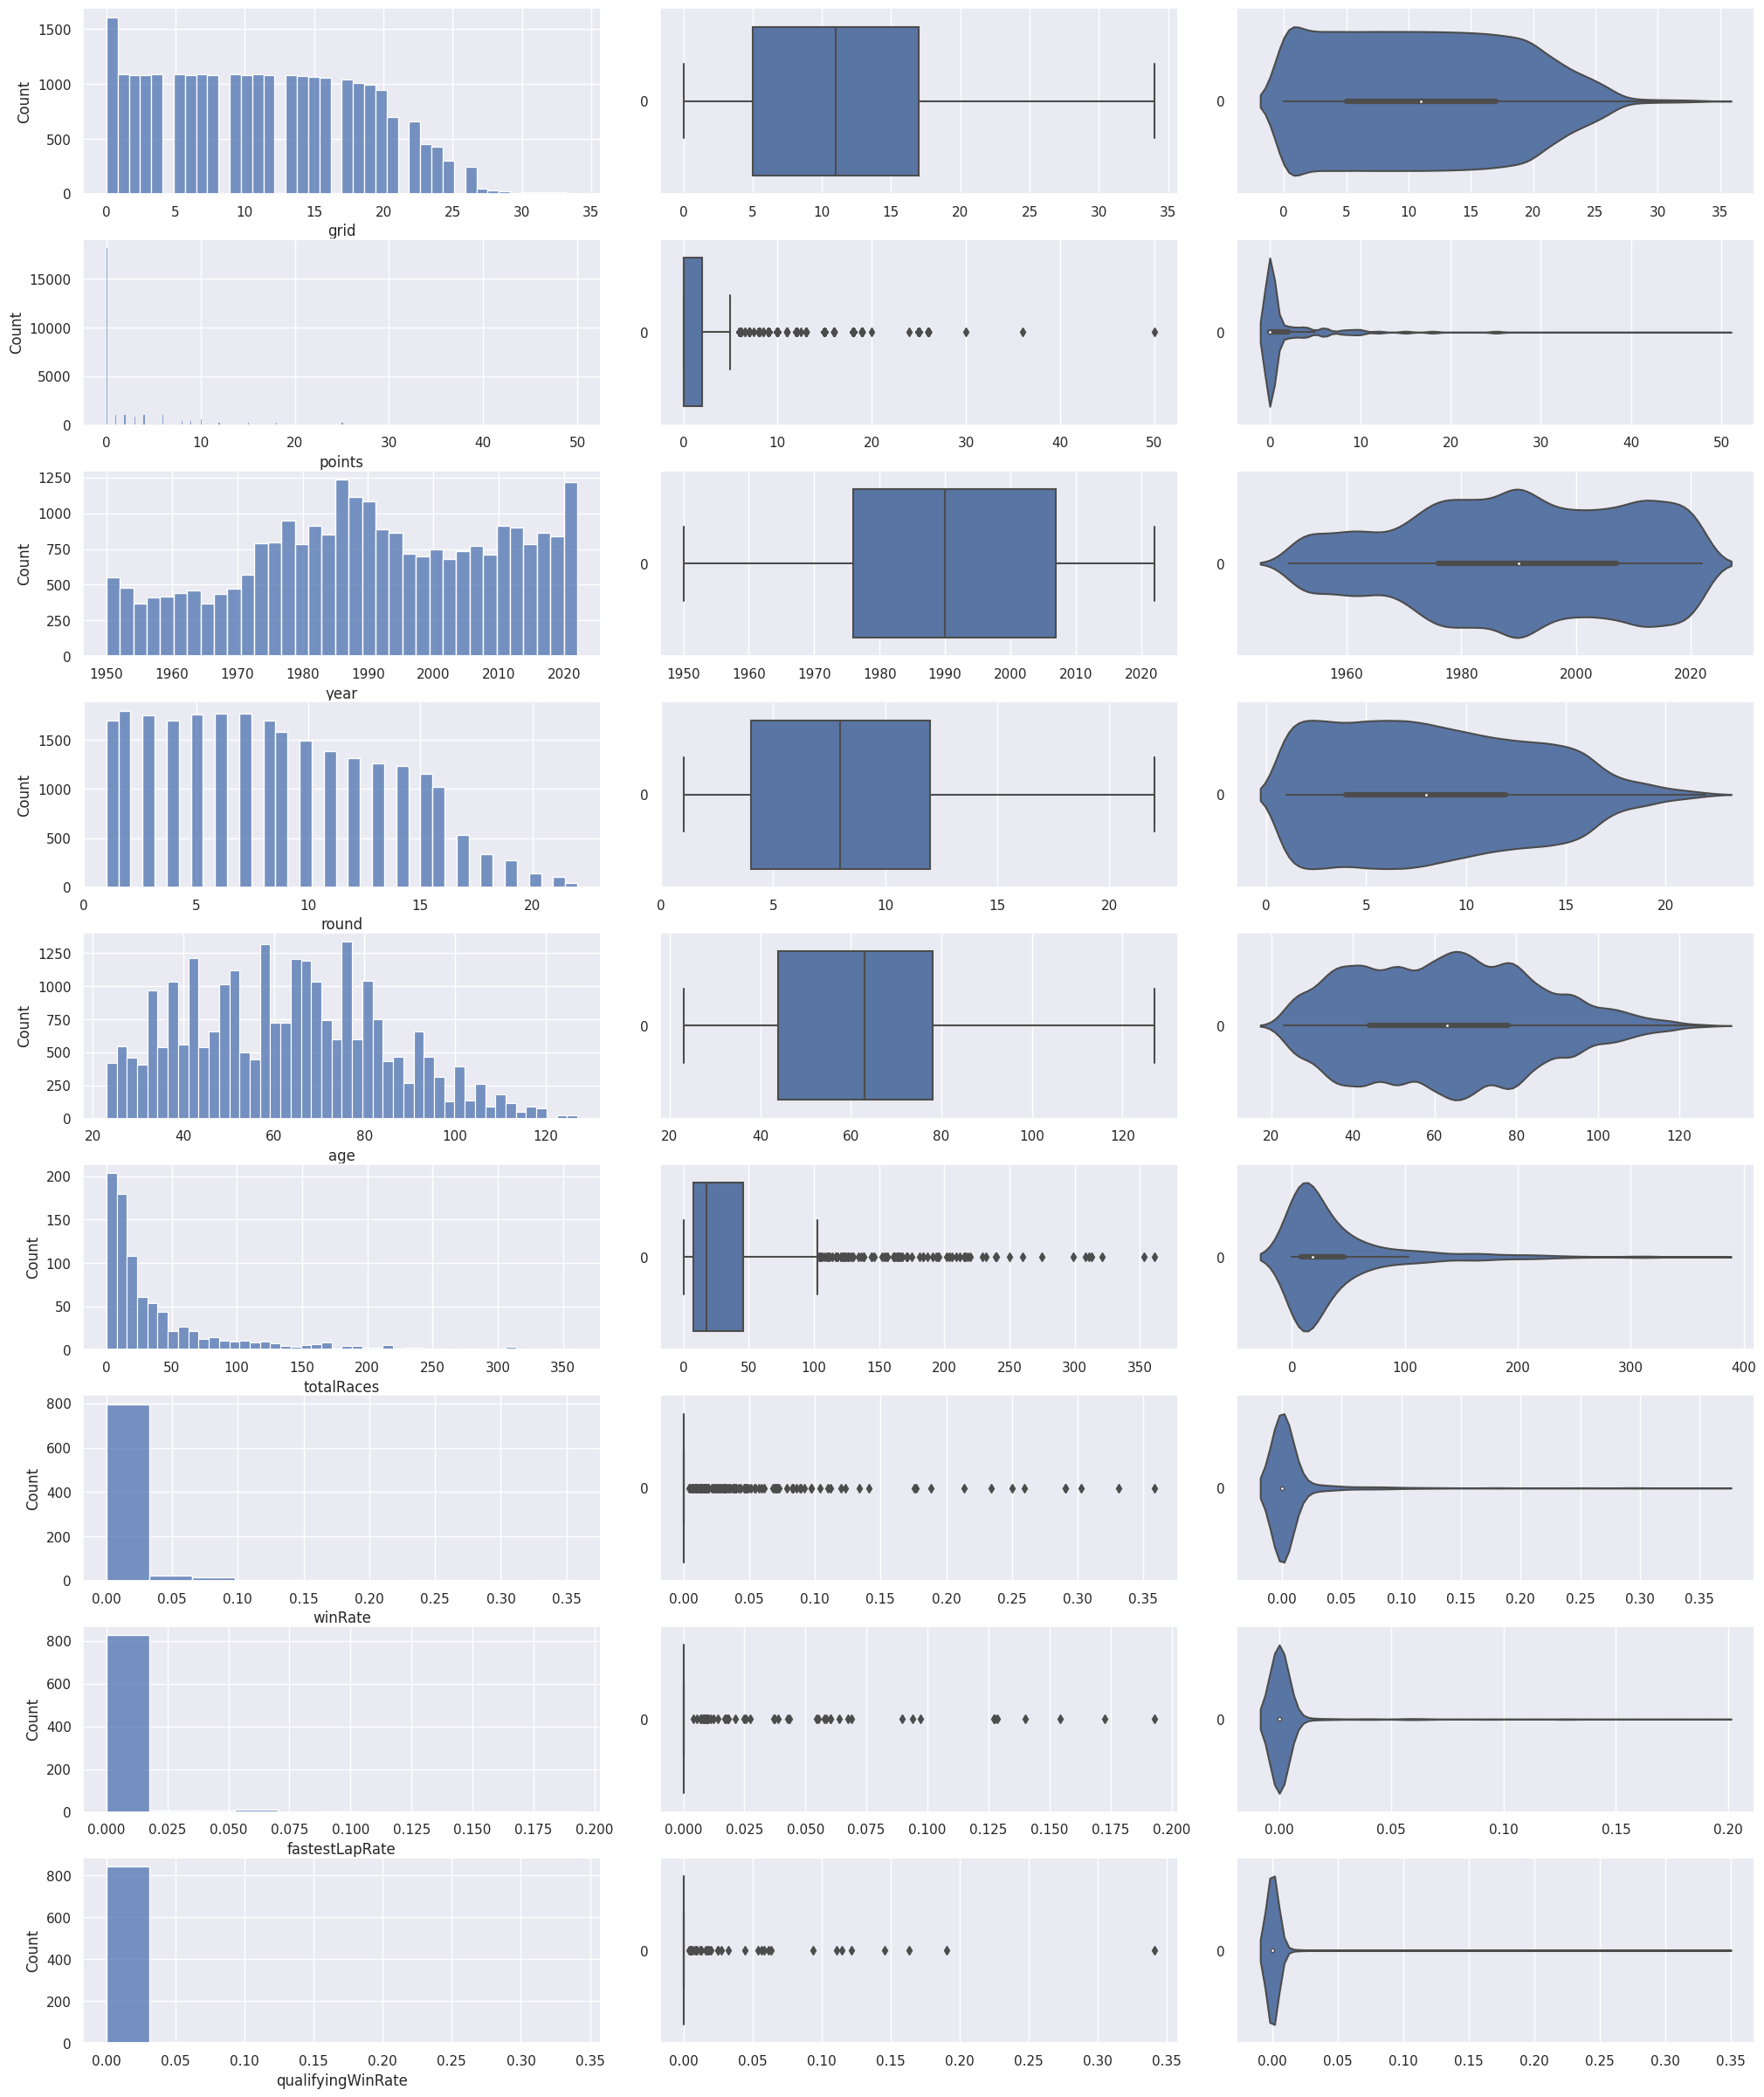

In [ ]:
# plotting the distributions of the level variables
f, axes = plt.subplots(9, 3, figsize=(20, 24))

df_numeric = pd.DataFrame(df_race[['grid', 'points', 'year', 'round', 'age']])
# Format the layout so that no overlapping between titles and graphs
df_numeric_1 = pd.DataFrame(df_driver[['totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate']])
plt.tight_layout()
count = 0

for var in df_numeric:
    sns.histplot(data = df_numeric[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric[var], orient = "h", ax = axes[count,2])
    count += 1
    
for var in df_numeric_1:
    sns.histplot(data = df_numeric_1[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric_1[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric_1[var], orient = "h", ax = axes[count,2])
    count += 1

In [24]:
df_race.describe()

,resultId,raceId,driverId,constructorId,grid,points,year,round,circuitId,age
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,1.877053,1990.251780,8.385991,23.486920,62.678444
std,7460.682031,299.440908,268.623016,59.732131,7.243725,4.169849,19.345632,4.958210,18.569371,21.744680
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1950.000000,1.000000,1.000000,23.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,0.000000,1976.000000,4.000000,9.000000,44.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,0.000000,1990.000000,8.000000,18.000000,63.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,2.000000,2007.000000,12.000000,34.000000,78.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,50.000000,2022.000000,22.000000,79.000000,127.000000


<ipython-input-25-6797a78c75f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_race.corr(),annot=True)


<Axes: >

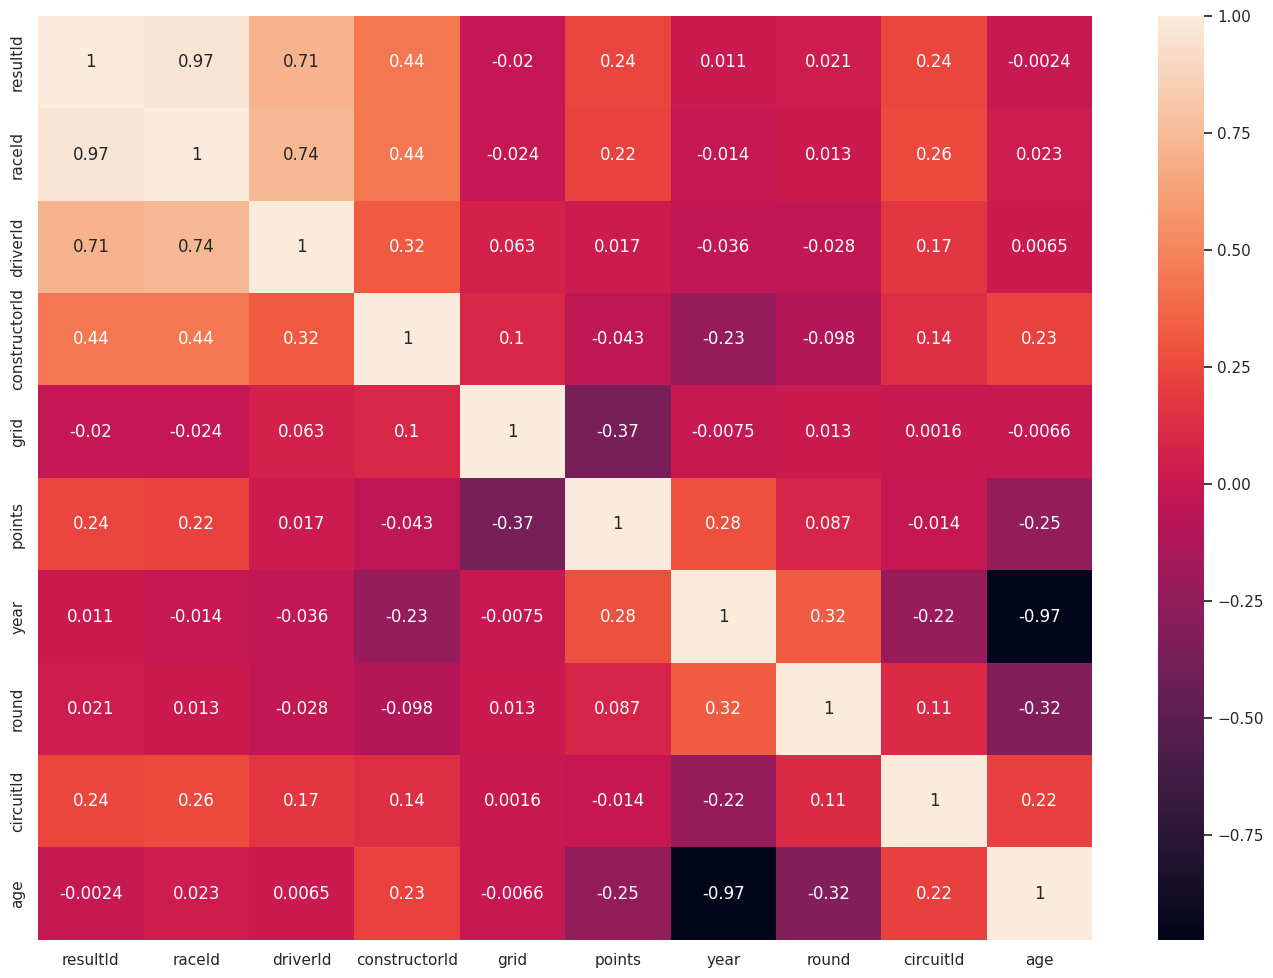

In [25]:
plt.figure(figsize=(17,12))
sns.heatmap(df_race.corr(),annot=True)

In [27]:
#Clasify race as the first half and second half by a new variable first_half
driver_result_withdate_divided = df_race.copy()
driver_result_withdate_divided['firstHalf'] = (driver_result_withdate_divided['date'].dt.month <= 6).astype(int)
driver_result_withdate_divided

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,dob,age,driver_name,firstHalf
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,1985-01-07,38.0,Lewis Hamilton,1
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,1985-01-07,38.0,Lewis Hamilton,1
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,1985-01-07,38.0,Lewis Hamilton,1
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,1985-01-07,38.0,Lewis Hamilton,1
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,1985-01-07,38.0,Lewis Hamilton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,18,0.0,15,2022,19,69,2022-10-23,ZHO,1999-05-30,24.0,Guanyu Zhou,0
25836,25798,1094,855,51,12,0.0,7,2022,20,32,2022-10-30,ZHO,1999-05-30,24.0,Guanyu Zhou,0
25837,25817,1095,855,51,13,0.0,17,2022,21,18,2022-11-13,ZHO,1999-05-30,24.0,Guanyu Zhou,0
25838,25837,1096,855,51,15,0.0,8,2022,22,24,2022-11-20,ZHO,1999-05-30,24.0,Guanyu Zhou,0


In [28]:
driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])

In [29]:
driver_result_withdate_groupby_year_divided.head()

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,dob,age,driver_name,firstHalf
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,1985-01-07,38.0,Lewis Hamilton,1
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,1985-01-07,38.0,Lewis Hamilton,1
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,1985-01-07,38.0,Lewis Hamilton,1
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,1985-01-07,38.0,Lewis Hamilton,1
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,1985-01-07,38.0,Lewis Hamilton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25827,25619,1084,855,51,13,0.0,9,2022,11,70,2022-07-10,ZHO,1999-05-30,24.0,Guanyu Zhou,0
25828,25641,1085,855,51,16,0.0,18,2022,12,34,2022-07-24,ZHO,1999-05-30,24.0,Guanyu Zhou,0
25829,25658,1086,855,51,12,0.0,5,2022,13,11,2022-07-31,ZHO,1999-05-30,24.0,Guanyu Zhou,0
25830,25679,1087,855,51,18,0.0,9,2022,14,13,2022-08-28,ZHO,1999-05-30,24.0,Guanyu Zhou,0


In [30]:
#itt mondjuk lehetett volna csak az idei szezon pilótáira
driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])

point_year_divided = driver_result_withdate_groupby_year_divided["points"].sum().unstack()
display(point_year_divided)

driverId          1    2    3     4    5    6    7    8    9    10   ...  \
date firstHalf                                                       ...   
1950 0            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
     1            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1951 0            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
     1            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1952 0            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...               ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
2020 0          347.0  NaN  NaN   NaN  NaN  NaN  NaN  4.0  NaN  NaN  ...   
2021 0          247.5  NaN  NaN  62.0  NaN  NaN  NaN  9.0  0.0  NaN  ...   
     1          138.0  NaN  NaN  19.0  NaN  NaN  NaN  1.0  NaN  NaN  ...   
2022 0          156.0  NaN  NaN  63.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
     1           77.0  NaN  NaN  18.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   

driverId          847    848  849  850  851   852  853   854  855  856  
date firstHalf                                                          
1950 0            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
     1            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
1951 0            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
     1            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
1952 0            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
...               ...    ...  ...  ...  ...   ...  ...   ...  ...  ...  
2020 0            3.0  105.0  0.0  0.0  0.0   NaN  NaN   NaN  NaN  NaN  
2021 0           16.0    NaN  7.0  NaN  NaN  23.0  0.0   0.0  NaN  NaN  
     1            0.0    NaN  0.0  NaN  NaN   9.0  0.0   0.0  NaN  NaN  
2022 0          151.0    1.0  2.0  NaN  NaN   1.0  NaN  12.0  1.0  2.0  
     1          111.0    3.0  0.0  NaN  NaN  11.0  NaN   0.0  5.0  NaN  

[145 rows x 855 columns]

In [31]:
age_year = driver_result_withdate_groupby_year_divided["age"].mean().unstack()

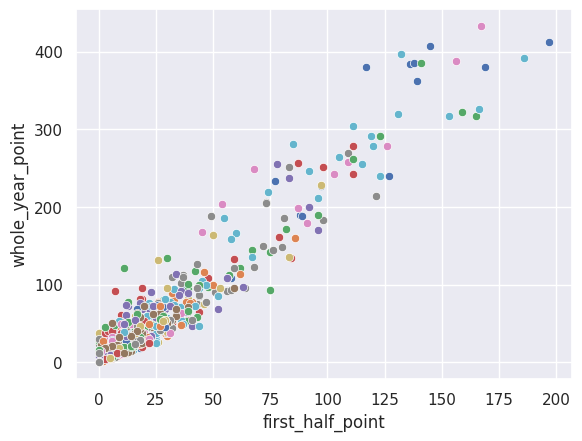

In [32]:
#Loop through each team 
#Column name is ID of each team
df_final = []
id_driver =[]
point_first_half_all = []
whole_year_point_all = []
for column in point_year_divided:
    point_year_driver_divided = point_year_divided[column].unstack()
    point_first_half = []
    whole_year_point = []
    ages = []
    age_one_year = age_year[column].unstack()
    point_year_driver_divided = pd.merge(point_year_driver_divided, age_one_year, on='date')
    #Loop through each year
    for row in point_year_driver_divided.iterrows():
        if not np.isnan(row[1][0]) and not np.isnan(row[1][1]) and (not np.isnan(row[1][2]) or not np.isnan(row[1][3])):
            if not np.isnan(row[1][2]):
                age = row[1][2]
            else:
                age = row[1][3]
            ages.append(age)
            id_driver.append(column)
            point_first_half.append(row[1][1])
            point_first_half_all.append(row[1][1])
            whole_year_point.append(row[1][0]+row[1][1])
            whole_year_point_all.append(row[1][0])
            
    new_df = pd.DataFrame({'first_half_point':point_first_half, 'ages': ages, 'whole_year_point':whole_year_point, 'id_driver':column})
    df_final.append(new_df)
    sns.scatterplot(x='first_half_point', y='whole_year_point', data=new_df)

In [33]:
df_final = pd.concat(df_final, ignore_index=True)

In [34]:
df_final

,first_half_point,ages,whole_year_point,id_driver
0,58.0,38.0,109.0,1
1,38.0,38.0,98.0,1
2,9.0,38.0,49.0,1
3,127.0,38.0,240.0,1
4,97.0,38.0,227.0,1
...,...,...,...,...
1786,11.0,23.0,12.0,852
1787,0.0,24.0,0.0,853
1788,0.0,24.0,0.0,854
1789,0.0,24.0,12.0,854


In [35]:
#df_join = df_final.merge(df_driver, left_on='id_driver', right_on='driverId')
df_join = df_final.merge(this_season_drivers, left_on='id_driver', right_on='driverId')


In [36]:
df_join

,first_half_point,ages,whole_year_point,id_driver,driverId,number_x,nationality_x,dob_x,code,nationality_y,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name
0,58.0,38.0,109.0,1,1,44,British,1985-01-07,HAM,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
1,38.0,38.0,98.0,1,1,44,British,1985-01-07,HAM,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
2,9.0,38.0,49.0,1,1,44,British,1985-01-07,HAM,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
3,127.0,38.0,240.0,1,1,44,British,1985-01-07,HAM,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
4,97.0,38.0,227.0,1,1,44,British,1985-01-07,HAM,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,7.0,27.0,92.0,848,848,23,Thai,1996-03-23,ALB,Thai,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
107,3.0,27.0,4.0,848,848,23,Thai,1996-03-23,ALB,Thai,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
108,9.0,23.0,32.0,852,852,22,Japanese,2000-05-11,TSU,Japanese,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda
109,11.0,23.0,12.0,852,852,22,Japanese,2000-05-11,TSU,Japanese,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda


In [38]:
df_join = df_join.drop(['id_driver','nationality_y'],1)
df_join

<ipython-input-38-316985e7f112>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_join = df_join.drop(['id_driver','nationality_y'],1)


,first_half_point,ages,whole_year_point,driverId,number_x,nationality_x,dob_x,code,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name
0,58.0,38.0,109.0,1,44,British,1985-01-07,HAM,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
1,38.0,38.0,98.0,1,44,British,1985-01-07,HAM,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
2,9.0,38.0,49.0,1,44,British,1985-01-07,HAM,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
3,127.0,38.0,240.0,1,44,British,1985-01-07,HAM,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
4,97.0,38.0,227.0,1,44,British,1985-01-07,HAM,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,7.0,27.0,92.0,848,23,Thai,1996-03-23,ALB,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
107,3.0,27.0,4.0,848,23,Thai,1996-03-23,ALB,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
108,9.0,23.0,32.0,852,22,Japanese,2000-05-11,TSU,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda
109,11.0,23.0,12.0,852,22,Japanese,2000-05-11,TSU,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda


In [72]:
#df_join = df_join.drop(['code','nationality_x'],1)
df_join = df_join.drop(['first_half_point','whole_year_point'],1)
df_join

<ipython-input-72-6354fe1702dc>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_join = df_join.drop(['first_half_point','whole_year_point'],1)


,ages,driverId,number_x,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name
0,38.0,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
1,38.0,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
2,38.0,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
3,38.0,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
4,38.0,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...
106,27.0,848,23,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
107,27.0,848,23,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
108,23.0,852,22,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda
109,23.0,852,22,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda


In [80]:
df_join = df_join.drop(['ages'],1)
df_join

<ipython-input-80-9f0d04a33522>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_join = df_join.drop(['ages'],1)


,driverId,number_x,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name
0,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
1,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
2,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
3,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
4,1,44,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton
...,...,...,...,...,...,...,...,...
106,848,23,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
107,848,23,61.0,0.00000,27,0.000000,0.000000,Alexander Albon
108,852,22,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda
109,852,22,45.0,0.00000,23,0.000000,0.000000,Yuki Tsunoda


In [74]:
this_season_drivers = this_season_drivers.drop(['nationality_y','dob_x','nationality_x','driver_name'],1)
this_season_drivers

<ipython-input-74-7a50a4cf5775>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  this_season_drivers = this_season_drivers.drop(['nationality_y','dob_x','nationality_x','driver_name'],1)


,driverId,number_x,code,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,44,HAM,311.0,0.331190,38,0.192926,0.340836
1,847,63,RUS,83.0,0.012048,25,0.060241,0.012048
2,830,33,VER,164.0,0.213415,26,0.140244,0.121951
3,815,11,PER,240.0,0.016667,33,0.037500,0.004167
4,844,16,LEC,104.0,0.048077,26,0.067308,0.163462
5,832,55,SAI,164.0,0.006098,29,0.018293,0.012195
6,4,14,ALO,361.0,0.088643,42,0.063712,0.063712
7,840,18,STR,124.0,0.000000,25,0.000000,0.008065
8,852,22,TSU,45.0,0.000000,23,0.000000,0.000000
9,856,45,DEV,8.0,0.000000,28,0.000000,0.000000


In [79]:
col_name = {'ages':'age'}

this_season_drivers.rename(columns=col_name,inplace=True)
this_season_drivers.head()

,driverId,number_x,code,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,44,HAM,311.0,0.331190,38,0.192926,0.340836
1,847,63,RUS,83.0,0.012048,25,0.060241,0.012048
2,830,33,VER,164.0,0.213415,26,0.140244,0.121951
3,815,11,PER,240.0,0.016667,33,0.037500,0.004167
4,844,16,LEC,104.0,0.048077,26,0.067308,0.163462


In [81]:
this_season_drivers = this_season_drivers.drop(['code'],1)
this_season_drivers

<ipython-input-81-03a24966ff4e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  this_season_drivers = this_season_drivers.drop(['code'],1)


,driverId,number_x,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,44,311.0,0.331190,38,0.192926,0.340836
1,847,63,83.0,0.012048,25,0.060241,0.012048
2,830,33,164.0,0.213415,26,0.140244,0.121951
3,815,11,240.0,0.016667,33,0.037500,0.004167
4,844,16,104.0,0.048077,26,0.067308,0.163462
5,832,55,164.0,0.006098,29,0.018293,0.012195
6,4,14,361.0,0.088643,42,0.063712,0.063712
7,840,18,124.0,0.000000,25,0.000000,0.008065
8,852,22,45.0,0.000000,23,0.000000,0.000000
9,856,45,8.0,0.000000,28,0.000000,0.000000


In [82]:
import pandas as pd

# Use the isnull() method to check for null values
null_values = df_join.isnull().sum()

# Display the count of null values for each column
print(null_values)

driverId             0
number_x             0
totalRaces           0
winRate              0
age                  0
fastestLapRate       0
qualifyingWinRate    0
driver_name          0
dtype: int64


In [84]:
df_join.isnull().sum() / len(df_join) * 100

driverId             0.0
number_x             0.0
totalRaces           0.0
winRate              0.0
age                  0.0
fastestLapRate       0.0
qualifyingWinRate    0.0
driver_name          0.0
dtype: float64

In [85]:
df_join.skew()

<ipython-input-85-8de241d39f1a>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_join.skew()


driverId            -0.849108
number_x             0.992681
totalRaces           0.143780
winRate              1.426158
age                  0.089922
fastestLapRate       0.981265
qualifyingWinRate    1.580933
dtype: float64

In [115]:
x = df_join.drop('driver_name',1)
y = df_join.driver_name

<ipython-input-115-be08b2cf7792>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_join.drop('driver_name',1)


In [116]:
from sklearn.model_selection import train_test_split
#itt 80-20%ban kell tanítási és tesztelési model
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
# importing ML libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [89]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverId           111 non-null    int64  
 1   number_x           111 non-null    int64  
 2   totalRaces         111 non-null    float64
 3   winRate            111 non-null    float64
 4   age                111 non-null    int64  
 5   fastestLapRate     111 non-null    float64
 6   qualifyingWinRate  111 non-null    float64
 7   driver_name        111 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.9+ KB


In [52]:
# changing datatype

df_join['number_x'] = pd.to_numeric(df_join['number_x'],errors='coerce')

df_join['dob_x'] = pd.to_datetime(df_join['dob_x'])

In [56]:
df_join.drop('dob_x',1,inplace=True)

<ipython-input-56-426b02ef9929>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_join.drop('dob_x',1,inplace=True)


In [90]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [91]:
tree.export_text(clf)

'|--- feature_2 <= 336.00\n|   |--- feature_2 <= 275.50\n|   |   |--- feature_2 <= 228.00\n|   |   |   |--- feature_1 <= 70.00\n|   |   |   |   |--- feature_4 <= 33.50\n|   |   |   |   |   |--- class: Lance Stroll\n|   |   |   |   |--- feature_4 >  33.50\n|   |   |   |   |   |--- class: Nico Hülkenberg\n|   |   |   |--- feature_1 >  70.00\n|   |   |   |   |--- class: Valtteri Bottas\n|   |   |--- feature_2 >  228.00\n|   |   |   |--- class: Sergio Pérez\n|   |--- feature_2 >  275.50\n|   |   |--- class: Lewis Hamilton\n|--- feature_2 >  336.00\n|   |--- class: Fernando Alonso\n'

In [92]:
fn = list(df_join.columns)
fn.remove('driver_name')

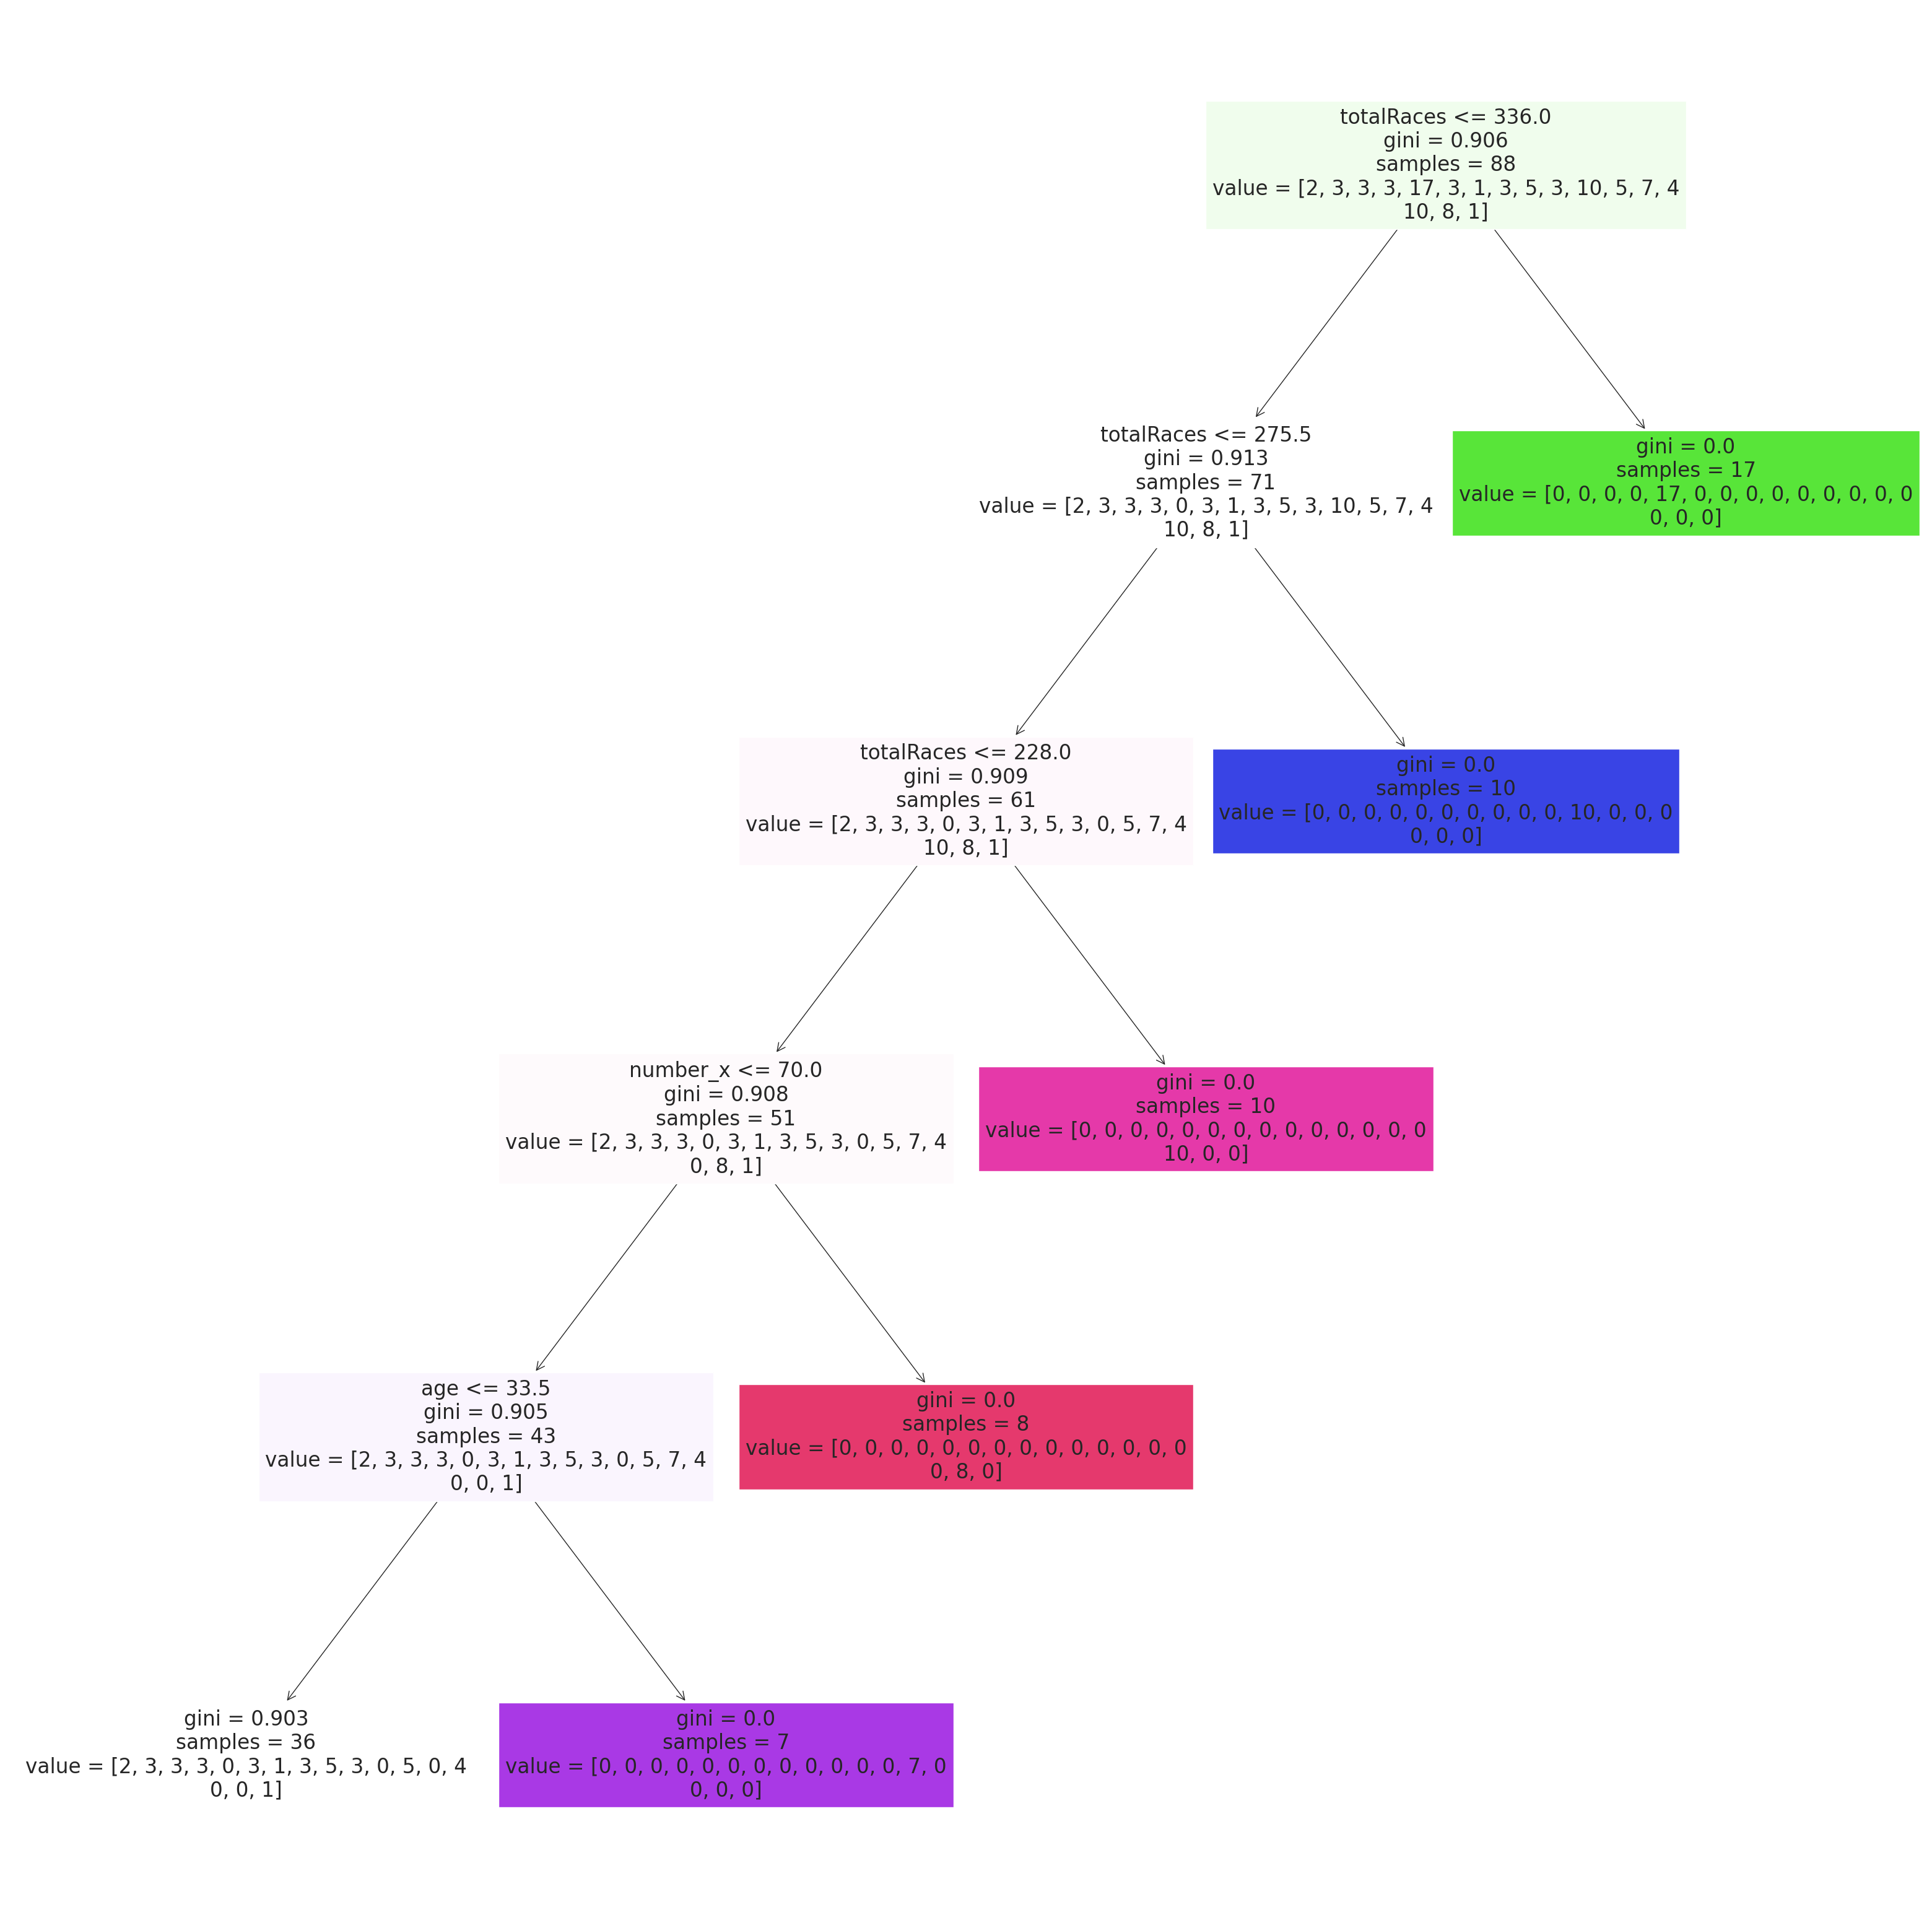

In [93]:
# plotting decision tree workflow 

fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

In [94]:
### MODELLING THE DATA ###
# classification ML algorithms 

lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [117]:
li = [lr,sgd,knn,gb,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})

LogisticRegression(solver='sag') : 56.52173913043478
SGDClassifier() : 30.434782608695656
KNeighborsClassifier() : 95.65217391304348
GaussianNB() : 100.0
RandomForestClassifier() : 100.0
DecisionTreeClassifier() : 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [120]:
for i in li:
  ypred = i.predict(this_season_drivers)
  print(i,':', ypred)

LogisticRegression(solver='sag') : ['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Lance Stroll' 'Valtteri Bottas' 'Fernando Alonso' 'Lance Stroll'
 'Lando Norris' 'George Russell' 'Lando Norris' 'George Russell'
 'Lance Stroll' 'Lance Stroll' 'Alexander Albon' 'Valtteri Bottas'
 'Lando Norris' 'Lando Norris' 'Nico Hülkenberg' 'Max Verstappen']
SGDClassifier() : ['Lewis Hamilton' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg'
 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg'
 'Nico Hülkenberg' 'Nico Hülkenberg' 'Sergio Pérez' 'Nico Hülkenberg'
 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg'
 'Sergio Pérez' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg']
KNeighborsClassifier() : ['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Charles Leclerc' 'Carlos Sainz' 'Fernando Alonso' 'Lance Stroll'
 'Alexander Albon' 'Alexander Albon' 'Lando Norris' 'Alexander Albon'
 'Esteban Ocon' 'Pierre Ga

In [122]:
ypred = lr.predict(this_season_drivers)
print('LogisticRegression(solver=\'sag\') :')
print(ypred)

LogisticRegression(solver='sag') :
['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Lance Stroll' 'Valtteri Bottas' 'Fernando Alonso' 'Lance Stroll'
 'Lando Norris' 'George Russell' 'Lando Norris' 'George Russell'
 'Lance Stroll' 'Lance Stroll' 'Alexander Albon' 'Valtteri Bottas'
 'Lando Norris' 'Lando Norris' 'Nico Hülkenberg' 'Max Verstappen']


In [123]:
ypred = sgd.predict(this_season_drivers)
print('KNeighborsClassifier() :')
print(ypred)

KNeighborsClassifier() :
['Lewis Hamilton' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg'
 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg'
 'Nico Hülkenberg' 'Nico Hülkenberg' 'Sergio Pérez' 'Nico Hülkenberg'
 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg'
 'Sergio Pérez' 'Nico Hülkenberg' 'Nico Hülkenberg' 'Nico Hülkenberg']


In [124]:
ypred = knn.predict(this_season_drivers)
print('SGDClassifier() :')
print(ypred)

SGDClassifier() :
['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Charles Leclerc' 'Carlos Sainz' 'Fernando Alonso' 'Lance Stroll'
 'Alexander Albon' 'Alexander Albon' 'Lando Norris' 'Alexander Albon'
 'Esteban Ocon' 'Pierre Gasly' 'Alexander Albon' 'Valtteri Bottas'
 'Alexander Albon' 'Alexander Albon' 'Nico Hülkenberg' 'Kevin Magnussen']


In [125]:
ypred = knn.predict(this_season_drivers)
print('KNeighborsClassifier() :')
print(ypred)

KNeighborsClassifier() :
['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Charles Leclerc' 'Carlos Sainz' 'Fernando Alonso' 'Lance Stroll'
 'Alexander Albon' 'Alexander Albon' 'Lando Norris' 'Alexander Albon'
 'Esteban Ocon' 'Pierre Gasly' 'Alexander Albon' 'Valtteri Bottas'
 'Alexander Albon' 'Alexander Albon' 'Nico Hülkenberg' 'Kevin Magnussen']


In [126]:
ypred = knn.predict(this_season_drivers)
print('GaussianNB() :')
print(ypred)

GaussianNB() :
['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Charles Leclerc' 'Carlos Sainz' 'Fernando Alonso' 'Lance Stroll'
 'Alexander Albon' 'Alexander Albon' 'Lando Norris' 'Alexander Albon'
 'Esteban Ocon' 'Pierre Gasly' 'Alexander Albon' 'Valtteri Bottas'
 'Alexander Albon' 'Alexander Albon' 'Nico Hülkenberg' 'Kevin Magnussen']


In [127]:
ypred = knn.predict(this_season_drivers)
print('RandomForestClassifier() :')
print(ypred)

RandomForestClassifier() :
['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Charles Leclerc' 'Carlos Sainz' 'Fernando Alonso' 'Lance Stroll'
 'Alexander Albon' 'Alexander Albon' 'Lando Norris' 'Alexander Albon'
 'Esteban Ocon' 'Pierre Gasly' 'Alexander Albon' 'Valtteri Bottas'
 'Alexander Albon' 'Alexander Albon' 'Nico Hülkenberg' 'Kevin Magnussen']


In [128]:
ypred = knn.predict(this_season_drivers)
print('DecisionTreeClassifier() :')
print(ypred)

DecisionTreeClassifier() :
['Lewis Hamilton' 'George Russell' 'Max Verstappen' 'Sergio Pérez'
 'Charles Leclerc' 'Carlos Sainz' 'Fernando Alonso' 'Lance Stroll'
 'Alexander Albon' 'Alexander Albon' 'Lando Norris' 'Alexander Albon'
 'Esteban Ocon' 'Pierre Gasly' 'Alexander Albon' 'Valtteri Bottas'
 'Alexander Albon' 'Alexander Albon' 'Nico Hülkenberg' 'Kevin Magnussen']


In [99]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)

In [100]:
li = [lr,sgd,rn,knn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

LogisticRegression(solver='sag') : 47.82608695652174
SGDClassifier() : 78.26086956521739
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 95.65217391304348
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


In [107]:
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
std = StandardScaler().fit(xtrain)
# transform train data
x_train_std = std.transform(xtrain)
# transform test data
x_test_std = std.transform(xtest)

In [108]:
li = [lr,sgd,rn,knn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

LogisticRegression(solver='sag') : 47.82608695652174
SGDClassifier() : 82.6086956521739
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 95.65217391304348
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0
